这一章开始讲降维相关的内容，首先梳理一下奇异值分解（singular value decomposition,SVD）的基本原理，它构成后续算法的基础，比如主成分分析，潜在语义分析等....

### 一.奇异值分解定义
将一个非零的$m\times n$实矩阵$A,A\in R^{m\times n}$，表示为如下三个实矩阵的乘积形式的运算，即进行矩阵的因子分解：   

$$
A=U\Sigma V^T
$$  

其中，$U$是$m$阶正交矩阵，$V$是$n$阶正交矩阵，$\Sigma$是由降序排列的非负对角元素组成的$m\times  n$矩形对角矩阵，用符号描述如下：   

$$
UU^T=I,VV^T=I\\
\Sigma=diag(\sigma_1,\sigma_2,...,\sigma_p),\sigma_1\geq\sigma_2\geq\cdots\geq\sigma_p\geq 0,p=min(m,n)
$$

### 二.奇异值分解定理
任意$m\times n$的实矩阵都可以进行奇异值分解，这便是奇异值分解定理，下面构造性的证明

#### 2.1求$\Sigma,V$
由于$A$是$m\times n$阶的矩阵，所以$A^TA$是一个$n\times n$实对称矩阵，故可以对其做正交分解使得：   

$$
V^T(A^TA)V=\Lambda
$$  

其中，$V$为n阶正交实矩阵，$\Lambda$为$n$阶对角阵，其对角线元素由$A^TA$的特征值构成，且这些特征值非负，下面简单说明，假设$\lambda$是$A^TA$的一个特征值，$x$是对应的特征向量，那么   

$$
||Ax||^2=x^TA^TAx=\lambda x^Tx=\lambda ||x||^2
$$  

所以：   

$$
\lambda=\frac{||Ax||^2}{||x||^2}>0
$$  

我们可以通过调整正交矩阵$V$的排列损失使得对应的特征值形成降序排列：   

$$
\lambda_1\geq\lambda_2\geq \cdots \geq\lambda_p\geq 0
$$  

接着计算奇异值：   

$$
\sigma_j=\sqrt{\lambda_j},j=1,2,...,q
$$  

假设$A$的秩为$r$，则$A^TA$的秩也为r，所以有：   

$$
\lambda_1\geq\lambda_2\geq \cdots \geq\lambda_r> 0,\lambda_{r+1}=\lambda_{r+2}=\cdots=\lambda_p=0
$$  

相应的，我们令：   

$$
V_1=[v_1,...,v_r],V_2=[v_{r+1},...,v_p]
$$  

则：   

$$
V=[V_1\ V_2]
$$  

同样地，我们令：  

$$
\Sigma_1=diag(\sigma_1,...,\sigma_r)
$$  

对其余部分填充0，使得：   

$$
\Sigma=\begin{bmatrix}
\Sigma_1 & 0\\ 
0 & 0
\end{bmatrix}
$$

#### 2.2 求$U$

接下来构造$m$阶正交实对称矩阵$U$，我们令：   

$$
u_j=\frac{1}{\sigma_j}Av_j,j=1,2,...,r
$$  

令：   

$$
U_1=[u_1,...,u_r]
$$  

那么，如下关系就可以成立了：   

$$
AV_1=U_1\Sigma_1
$$  

接下来，再为$U_1$扩充$m-r$个标准正交向量，令$[u_{r+1},...,u_m]$为$N(A^T)$的一组正交基，并令：   

$$
U_2=[u_{r+1},...,u_m]\\
U=[U_1\ U_2]
$$  

所以：   

$$
U\Sigma V^T=\begin{bmatrix}
U_1 & U_2
\end{bmatrix}
\begin{bmatrix}
\Sigma_1 & 0\\ 
0 & 0
\end{bmatrix}
\begin{bmatrix}
V_1^T\\ 
V_2^T 
\end{bmatrix}=U_1\Sigma_1V_1^T=AV_1V_1^T=A
$$  


### 三.紧奇异值分解与截断奇异值分解
#### 3.1紧奇异值分解

上面第二节的分解方式称为完全奇异分解，大家可以发现，如果$r<p$，我们完全没有必要对$U_1$以及$V_1$进行扩充，因为通过$U_1,\Sigma_1,V_1$就可以无损还原$A$，即：   

$$
A=U_1\Sigma_1V_1^T
$$  

这便是紧奇异分解  

#### 3.2截断奇异值分解

另外，我们也可以只取最大的$k$个奇异值（$k<r$）对应的部分去近似$A$，这便是截断奇异值分解，即：   

$$
A\simeq U_k\Sigma_kV_k^T
$$  

这里，$U_k$是一个$m\times k$的矩阵，由$U$的前$k$列得到，$V_k$是$n\times k$矩阵，由$V$的前$k$列得到，$\Sigma_k$是$k$阶对角矩阵，由$\Sigma$的前$k$行$k$列得到，下面通过对图像的SVD分解不同截断来加深理解，[参考自>>>](https://blog.csdn.net/sunswordsman/article/details/86450068)

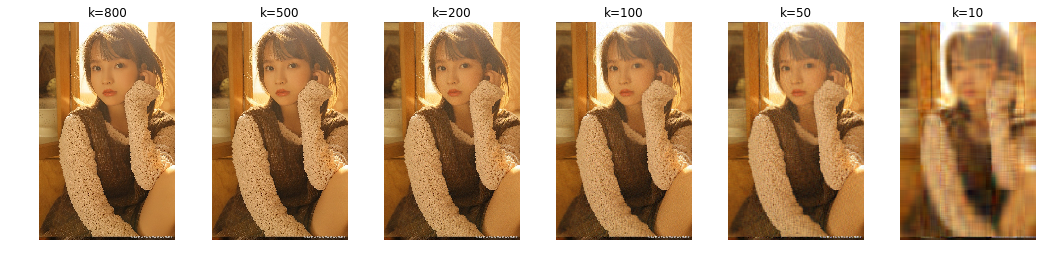

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (18,4))
im = plt.imread('./source/19_降维_svd_demo.jpg')
ks=[800,500,200,100,50,10]#分别截取不同的k
for idx,k in enumerate(ks):
    svd_image = []
    for ch in range(3):#注意,有RGB三个维度,每个维度对应一个矩阵做SVD分解
        im_ch = im[:,:,ch]
        U,D,VT = np.linalg.svd(im_ch)
        imx = np.matmul(np.matmul(U[:,:k],np.diag(D[:k])),VT[:k,:])
        # 将像素值约束到合理范围
        imx = np.where(imx<0,0,imx)
        imx = np.where(imx>255,255,imx)
        svd_image.append(imx.astype('uint8'))
    img = np.stack((svd_image[0], svd_image[1], svd_image[2]), 2)
    plt.subplot(1,len(ks),idx+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("k="+str(k))

显然，$k$越小图片越模糊...，另外我们可以发现$k=800$与$k=50$的画质差距并不大，间接反映出奇异值从大到小，其实衰减很快，所以仅保留少许的$k$即可还原一个不错的图片效果